## ETL

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [19]:
df = pd.read_csv(r"C:\Users\debor\OneDrive\Documentos\PRACTICA\Dataset _NY\updated_air_quality_data.csv")

In [20]:
# Primeras filas del DataFrame
print(df.head())

   Unique ID               Name  Measure Geo Type Name Geo Place Name  \
0     179772          Emissions  Density         UHF42         Queens   
1     179785          Emissions  Density         UHF42        Unknown   
2     178540  General Pollution    Miles         UHF42        Unknown   
3     178561  General Pollution    Miles         UHF42         Queens   
4     823217  General Pollution    Miles         UHF42         Queens   

      Time Period  Start_Date  Data Value Air Quality Category  
0           Other  2015-01-01         0.3                 Good  
1           Other  2015-01-01         1.2                 Good  
2  Annual Average  2011-12-01         8.6                 Good  
3  Annual Average  2011-12-01         8.0                 Good  
4          Summer  2022-06-01         6.1                 Good  


In [21]:
# Información sobre las columnas y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             18016 non-null  int64  
 1   Name                  18016 non-null  object 
 2   Measure               18016 non-null  object 
 3   Geo Type Name         18016 non-null  object 
 4   Geo Place Name        18016 non-null  object 
 5   Time Period           18016 non-null  object 
 6   Start_Date            18016 non-null  object 
 7   Data Value            18016 non-null  float64
 8   Air Quality Category  18016 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB
None


In [22]:
# Estadísticas descriptivas básicas
print(df.describe())

           Unique ID    Data Value
count   18016.000000  18016.000000
mean   426187.112789     21.412678
std    250391.154793     23.976151
min    121644.000000      0.000000
25%    175300.750000      8.900000
50%    410798.500000     15.200000
75%    649886.250000     26.700000
max    828353.000000    424.700000


In [23]:
# Cambio de tipo de dato
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique ID             18016 non-null  int64         
 1   Name                  18016 non-null  object        
 2   Measure               18016 non-null  object        
 3   Geo Type Name         18016 non-null  object        
 4   Geo Place Name        18016 non-null  object        
 5   Time Period           18016 non-null  object        
 6   Start_Date            18016 non-null  datetime64[ns]
 7   Data Value            18016 non-null  float64       
 8   Air Quality Category  18016 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB
None


In [24]:
start_dates = df['Start_Date']
print(start_dates.head())

0   2015-01-01
1   2015-01-01
2   2011-12-01
3   2011-12-01
4   2022-06-01
Name: Start_Date, dtype: datetime64[ns]


## EDA

<Axes: >

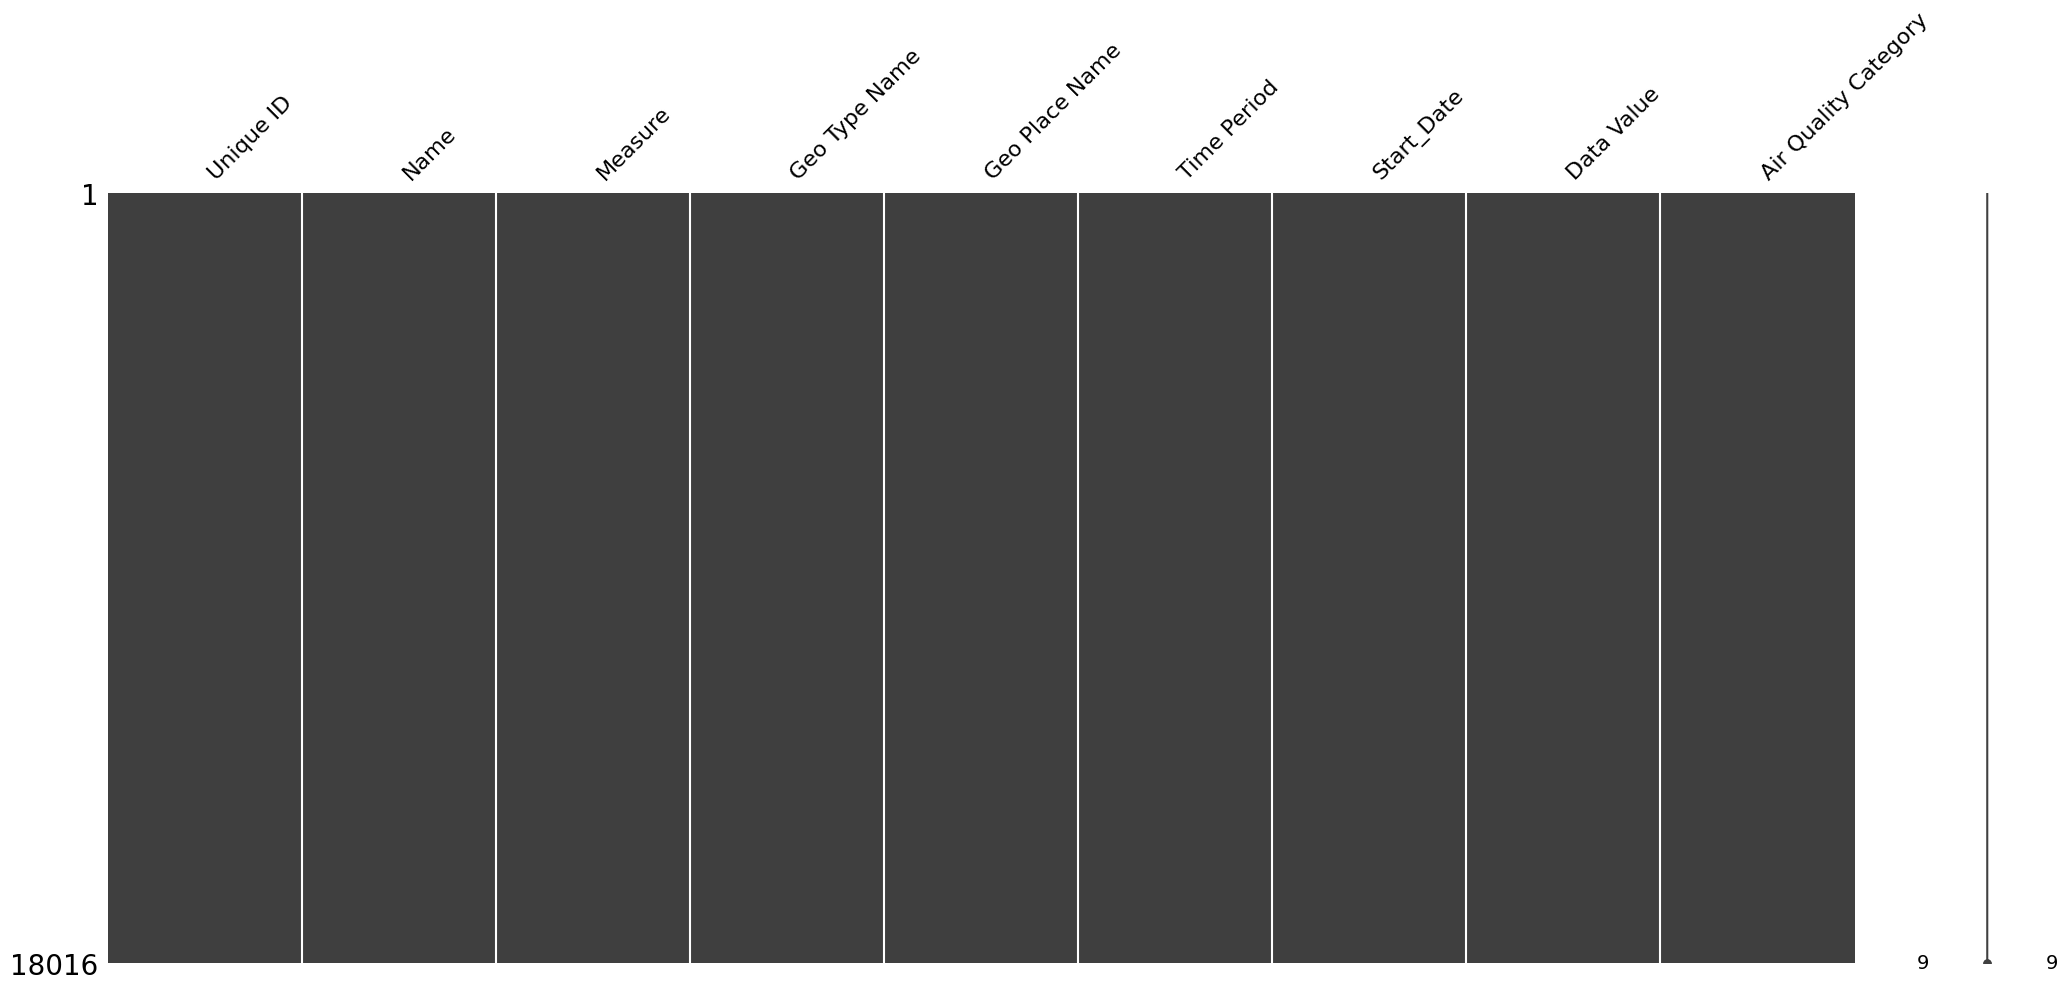

In [25]:
# Se visualizan datos faltantes
msno.matrix(df)

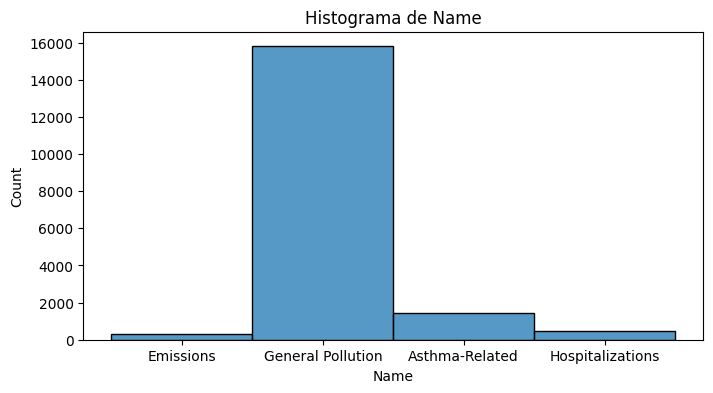

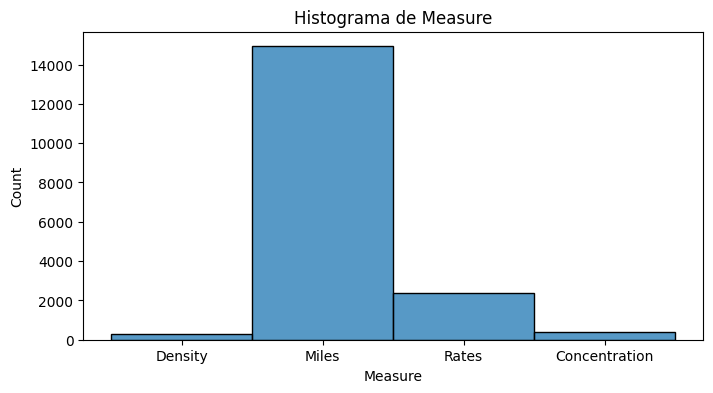

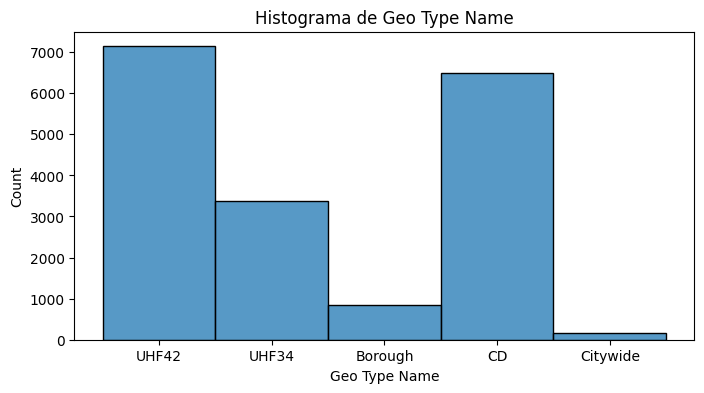

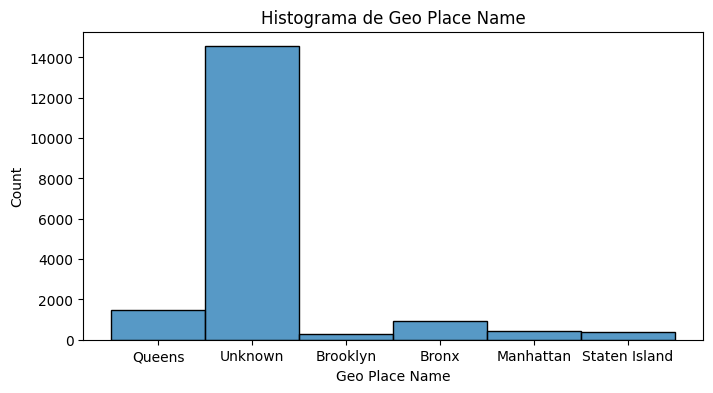

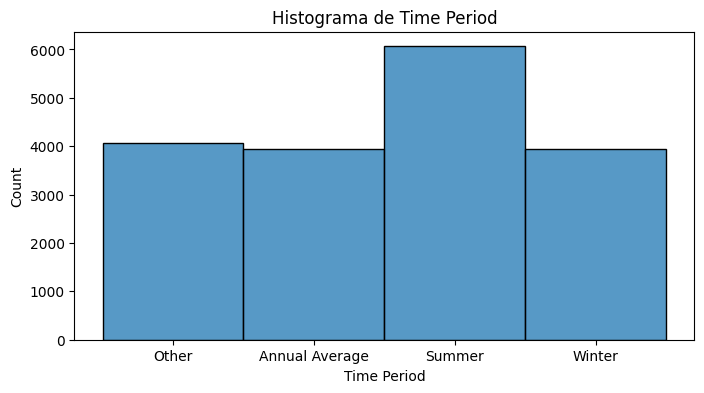

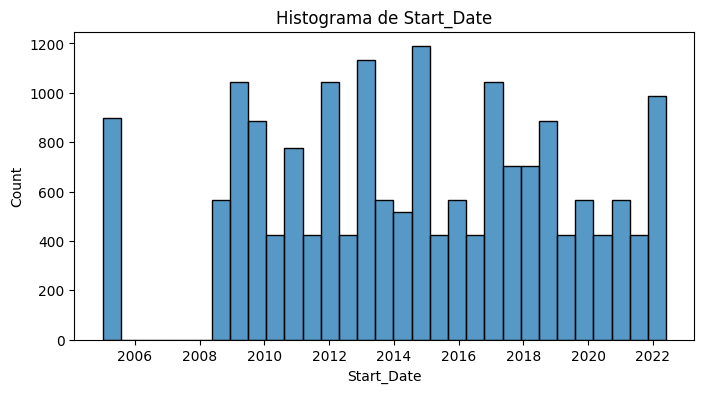

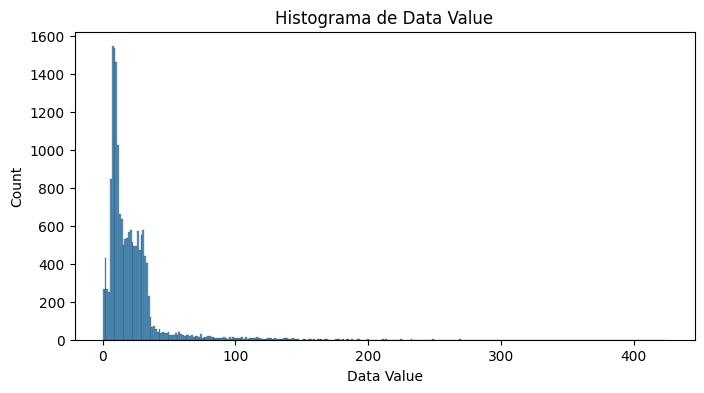

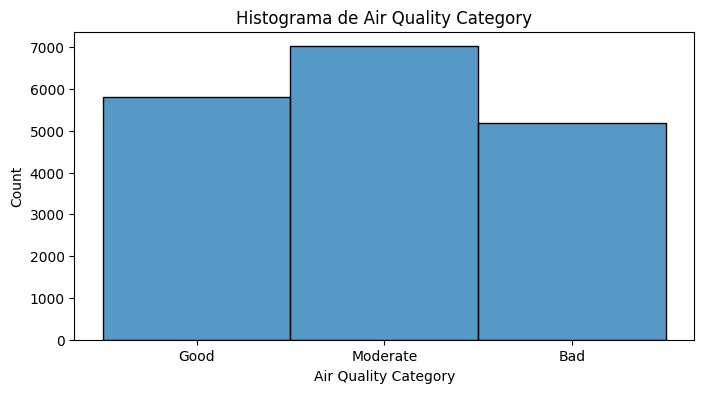

In [26]:
# Lista de variables que quieres graficar
variables = ['Name', 'Measure', 'Geo Type Name', 'Geo Place Name', 'Time Period', 'Start_Date', 'Data Value', 'Air Quality Category']

# Crear un histograma para cada variable
for variable in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable])
    plt.title(f'Histograma de {variable}')
    plt.show()

In [27]:
# Gráfico de dispersión
#sns.scatterplot(x='variable_x', y='variable_y', data=datos)

### Estadísticas Descriptivas

In [28]:
# Descripción general de los valores num. de calidad de aire
print (df['Data Value'].describe())

count    18016.000000
mean        21.412678
std         23.976151
min          0.000000
25%          8.900000
50%         15.200000
75%         26.700000
max        424.700000
Name: Data Value, dtype: float64


In [29]:
# Descripción por nombre de División Geográfica
print(df.groupby('Geo Type Name')['Data Value'].describe())

                count       mean        std  min    25%    50%     75%    max
Geo Type Name                                                                
Borough         850.0  24.107294  27.546712  0.0  8.425  15.70  28.875  212.5
CD             6490.0  19.668166  17.331558  0.3  9.100  15.20  26.100  191.2
Citywide        170.0  23.367059  23.604610  0.5  8.300  15.75  29.475  126.3
UHF34          3366.0  17.104605   8.823389  4.9  9.200  14.60  24.600   42.8
UHF42          7140.0  24.662003  31.850170  0.0  8.500  15.40  28.400  424.7


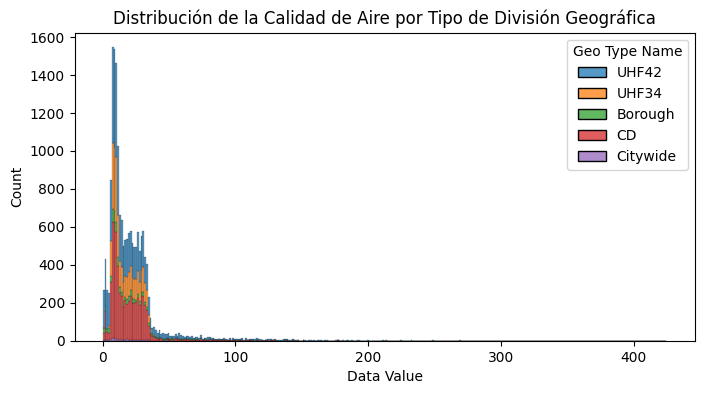

In [30]:
# Histograma de calidad del aire por nombre de División Geográfica
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Data Value', hue='Geo Type Name', multiple='stack')
plt.title('Distribución de la Calidad de Aire por Tipo de División Geográfica')
plt.show()

In [31]:
# Descripción por nombre de Lugar Geogáfico
print(df.groupby('Geo Place Name')['Data Value'].describe())

                  count       mean        std  min    25%    50%     75%  \
Geo Place Name                                                             
Bronx             917.0  23.751363  27.946190  0.3  9.200  16.20  27.500   
Brooklyn          280.0  23.022500  22.505833  0.1  9.100  17.55  28.125   
Manhattan         439.0  25.172665  26.075633  0.9  9.900  20.40  28.850   
Queens           1466.0  18.347817  16.986529  0.0  7.800  12.80  23.900   
Staten Island     368.0  15.578804  11.375234  0.0  7.875  11.65  20.050   
Unknown         14546.0  21.577258  24.446674  0.0  9.000  15.50  26.800   

                  max  
Geo Place Name         
Bronx           232.6  
Brooklyn        146.1  
Manhattan       179.4  
Queens          152.7  
Staten Island    70.7  
Unknown         424.7  


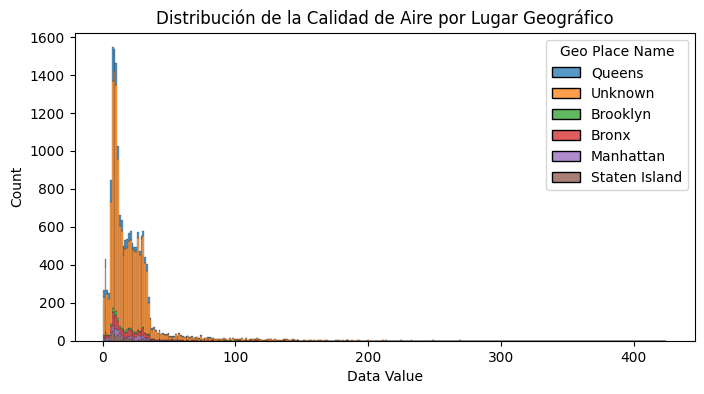

In [32]:
# Histograma de calidad del aire por Lugar Geográfico
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='Data Value', hue='Geo Place Name', multiple='stack')
plt.title('Distribución de la Calidad de Aire por Lugar Geográfico')
plt.show()

### Análisis por período de tiempo

De aca en mas hay que revisar, porque lo hice desconcentrada.

In [37]:
# Promedio de la calidad del aire por año
df['Year'] = df['Start_Date'].dt.year
promedio_anual= df.groupby('Year')['Data Value'].mean()

In [38]:
# Se convierteel resultado en una serie par luego poder graficar la tendencia anual
promedio_anual = promedio_anual.reset_index()

In [39]:
# Visualización de la tendencia anual
plt.figure(figsize=(8,4))
sns.lineplot(x=promedio_anual.index, y=promedio_anual.values)
plt.title('Tendencia Anual de la Calidad del Aire')
plt.xlabel('Indice de Calidad del Aire')
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

<Figure size 800x400 with 0 Axes>

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18016 entries, 0 to 18015
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique ID             18016 non-null  int64         
 1   Name                  18016 non-null  object        
 2   Measure               18016 non-null  object        
 3   Geo Type Name         18016 non-null  object        
 4   Geo Place Name        18016 non-null  object        
 5   Time Period           18016 non-null  object        
 6   Start_Date            18016 non-null  datetime64[ns]
 7   Data Value            18016 non-null  float64       
 8   Air Quality Category  18016 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.2+ MB
None
